In [20]:
import numpy as np

#test
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

from scipy import optimize 
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

import pandas as pd
from types import SimpleNamespace
# Import your own code
from  inauguralproject import ExchangeEconomy

model = ExchangeEconomyClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'inauguralproject'

Ovenstående kode er givet i forvejen

Question 1. boom

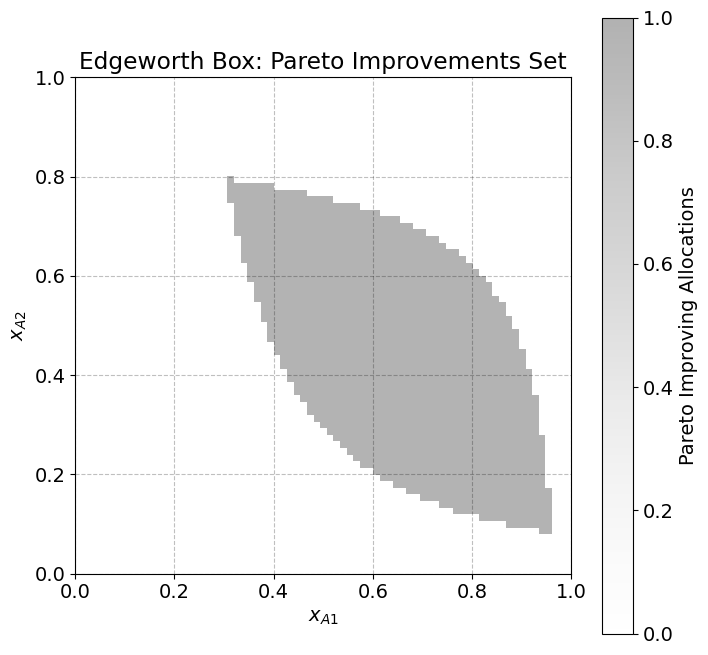

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace

class ExchangeEconomyClass:
    def __init__(self):
        # Initialize model parameters
        par = self.par = SimpleNamespace()
        par.alpha = 1/3  # Preference parameter for consumer A
        par.beta = 2/3   # Preference parameter for consumer B
        par.w1A = 0.8    # Initial endowment of good 1 for consumer A
        par.w2A = 0.3    # Initial endowment of good 2 for consumer A

        # Calculate initial utility levels based on the endowments
        self.uA_initial = self.utility_A(par.w1A, par.w2A)
        self.uB_initial = self.utility_B(1 - par.w1A, 1 - par.w2A)

    def utility_A(self, x1A, x2A):
        # Utility function for consumer A
        return x1A ** self.par.alpha * x2A ** (1 - self.par.alpha)

    def utility_B(self, x1B, x2B):
        # Utility function for consumer B
        return x1B ** self.par.beta * x2B ** (1 - self.par.beta)

    def find_pareto_improvements(self):
        # Generate a grid of possible allocations for xA1 and xA2
        N = 75
        x1A_grid = np.linspace(0, 1, N)
        x2A_grid = np.linspace(0, 1, N)
        pareto_set = np.zeros((N, N))

        # Check each allocation to see if it's a Pareto improvement
        for i, x1A in enumerate(x1A_grid):
            for j, x2A in enumerate(x2A_grid):
                x1B, x2B = 1 - x1A, 1 - x2A
                uA = self.utility_A(x1A, x2A)
                uB = self.utility_B(x1B, x2B)

                # Mark the allocation if it improves both A's and B's utility
                if uA >= self.uA_initial and uB >= self.uB_initial:
                    pareto_set[i, j] = 1

        return x1A_grid, x2A_grid, pareto_set

# Initialize the economy class and find the Pareto improvements
economy = ExchangeEconomyClass()
x1A_grid, x2A_grid, pareto_set = economy.find_pareto_improvements()

# Visualize the Pareto improvements in the Edgeworth box
plt.figure(figsize=(8, 8))
plt.imshow(pareto_set, extent=(0, 1, 0, 1), origin='lower', cmap='Greys', alpha=0.3)
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')
plt.title('Edgeworth Box: Pareto Improvements Set')
plt.colorbar(label='Pareto Improving Allocations')
plt.grid(True)
plt.show()

# Question 2.

We make a loop and print out the possible results

In [14]:
## defining p1 
N = 75  
P1 = [] 
for i in range(N + 1):
    ## formula given in the task
    P1.append( 0.5 + i * (2 / N))
P1 = np.round(P1,3)
print(P1)

[0.5   0.527 0.553 0.58  0.607 0.633 0.66  0.687 0.713 0.74  0.767 0.793
 0.82  0.847 0.873 0.9   0.927 0.953 0.98  1.007 1.033 1.06  1.087 1.113
 1.14  1.167 1.193 1.22  1.247 1.273 1.3   1.327 1.353 1.38  1.407 1.433
 1.46  1.487 1.513 1.54  1.567 1.593 1.62  1.647 1.673 1.7   1.727 1.753
 1.78  1.807 1.833 1.86  1.887 1.913 1.94  1.967 1.993 2.02  2.047 2.073
 2.1   2.127 2.153 2.18  2.207 2.233 2.26  2.287 2.313 2.34  2.367 2.393
 2.42  2.447 2.473 2.5  ]


Now we are able to go through all the market clearing conditions

In [19]:
error = []

for x in p1:
    append_e = model.check_market_clearing(x)
    error.append(append_e)

print(error[0:1])


TypeError: 'numpy.float64' object is not iterable

Question 4a. using minimize

In [21]:
# Define the utility function for A
def utility_A(x1, x2):
    return x1**(1/3) * x2**(2/3)

# Define demand functions for A
def demand_A(p1, omega_1A=0.8, omega_2A=0.3, p2=1):
    alpha = 1/3
    x1A = alpha * (p1 * omega_1A + p2 * omega_2A) / p1
    x2A = (1 - alpha) * (p1 * omega_1A + p2 * omega_2A) / p2
    return x1A, x2A

# Re-define the set of p1 values to consider
P1 = np.linspace(0.5, 2.5, 75)

# Initialize variables to find the optimal p1, maximum utility, and corresponding consumptions
optimal_p1 = None
max_utility = 0
optimal_x1A = None
optimal_x2A = None

# Loop through each p1 value in P1
for p1 in P1:
    # Calculate demands for A
    x1A, x2A = demand_A(p1)
    
    # Calculate utility for A and update optimal values if this utility is higher
    utility = utility_A(x1A, x2A)
    if utility > max_utility:
        max_utility = utility
        optimal_p1 = p1
        optimal_x1A = x1A
        optimal_x2A = x2A

# Output the optimal p1 value found and A's consumption of goods 1 and 2
optimal_p1, optimal_x1A, optimal_x2A
# Print out the desired information
print(f"P1: ({optimal_p1})")
print(f"A's consumption of good 1: {x1A}")
print(f"A's consumption of good 2: {x2A}")

P1: (2.5)
A's consumption of good 1: 0.30666666666666664
A's consumption of good 2: 1.5333333333333334


Question 4b. using minimize

In [2]:
# Generate a dense range of p1 values to simulate "any positive price"
dense_P1 = np.linspace(0.01, 10, 1000)  # From 0.01 to 10, with 1000 steps

class ExchangeEconomyAnyPrice(ExchangeEconomyUpdated):
    def find_optimal_allocation_any_price(self, P1):
        return super().find_optimal_allocation(P1)

# Create an instance of the ExchangeEconomy for any positive price
economy_any_price = ExchangeEconomyAnyPrice()

# Find the optimal p1 and A's consumption of goods 1 and 2 with any positive price
optimal_p1_any, x1A_any, x2A_any = economy_any_price.find_optimal_allocation_any_price(dense_P1)

# Print out the results
print(f"Optimal P1: {optimal_p1_any}")
print(f"A's consumption of good 1: {x1A_any}")
print(f"A's consumption of good 2: {x2A_any}")


NameError: name 'ExchangeEconomyUpdated' is not defined

Question 5

In [10]:
from scipy.optimize import minimize

class ExchangeEconomyClass:
    def __init__(self, alpha, beta, w1A, w2A):
        self.alpha = alpha
        self.beta = beta
        self.w1A = w1A
        self.w2A = w2A
        # Assuming the total endowment of both goods is normalized to 1
        self.w1B = 1 - w1A
        self.w2B = 1 - w2A
        # Initialize utilities at the initial endowment
        self.utility_A_initial = self.utility_A(w1A, w2A)
        self.utility_B_initial = self.utility_B(self.w1B, self.w2B)

    def utility_A(self, x1A, x2A):
        # Define utility function for consumer A
        return x1A ** self.alpha * x2A ** (1 - self.alpha)

    def utility_B(self, x1B, x2B):
        # Define utility function for consumer B
        return x1B ** self.beta * x2B ** (1 - self.beta)

    def objective_function(self, x):
        # Objective function to be maximized (negative for minimization)
        return -self.utility_A(x[0], x[1])

    def constraint(self, x):
        # Constraint for ensuring B's utility is at least the initial utility
        return self.utility_B(1 - x[0], 1 - x[1]) - self.utility_B_initial

# Initialize the economy
economy = ExchangeEconomyClass(alpha=1/3, beta=2/3, w1A=0.8, w2A=0.3)

# Define constraints and bounds
constraints = ({'type': 'ineq', 'fun': economy.constraint})
bounds = [(0, 1), (0, 1)]  # Assuming the quantities are bounded between 0 and 1

# Perform the optimization
initial_guess = [economy.w1A, economy.w2A]
result = minimize(economy.objective_function, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

if result.success:
    optimal_allocation_A = result.x
    optimal_utility_A = -result.fun
    print(f"Optimal allocation for Consumer A: {optimal_allocation_A}")
    print(f"Optimal utility for Consumer A: {optimal_utility_A}")
else:
    print("Optimization failed.")



Optimal allocation for Consumer A: [0.57574506 0.84443779]
Optimal utility for Consumer A: 0.7432276287150864


Question 5b

In [ ]:
from scipy.optimize import minimize

class ExchangeEconomyClass:
    def __init__(self, alpha, beta, w1A, w2A):
        self.alpha = alpha
        self.beta = beta
        self.w1A = w1A
        self.w2A = w2A
        # Assuming the total endowment of both goods is normalized to 1
        self.w1B = 1 - w1A
        self.w2B = 1 - w2A
        # Initialize utilities at the initial endowment
        self.utility_A_initial = self.utility_A(w1A, w2A)
        self.utility_B_initial = self.utility_B(self.w1B, self.w2B)

    def utility_A(self, x1A, x2A):
        # Define utility function for consumer A
        return x1A ** self.alpha * x2A ** (1 - self.alpha)

    def utility_B(self, x1B, x2B):
        # Define utility function for consumer B
        return x1B ** self.beta * x2B ** (1 - self.beta)

    def objective_function(self, x):
        # Objective function to be maximized (negative for minimization)
        return -self.utility_A(x[0], x[1])

    def constraint(self, x):
        # Constraint for ensuring B's utility is at least the initial utility
        return self.utility_B(1 - x[0], 1 - x[1]) - self.utility_B_initial

# Initialize the economy
economy = ExchangeEconomyClass(alpha=1/3, beta=2/3, w1A=0.8, w2A=0.3)

# Set up the optimization problem
constraints = [{'type': 'ineq', 'fun': economy.constraint}]
bounds = [(0, 1), (0, 1)]  # Ensure non-negative allocations
initial_guess = [0.5, 0.5]  # A reasonable starting point within the bounds

# Perform the optimization
result = minimize(economy.objective_function, initial_guess, bounds=bounds, method='SLSQP', constraints=constraints)

if result.success:
    optimal_allocation_A = result.x
    optimal_utility_A = -result.fun
    print(f"Optimal allocation for Consumer A: {optimal_allocation_A}")
    print(f"Optimal utility for Consumer A: {optimal_utility_A}")
else:
    print("Optimization failed:", result.message)

Question 6a

In [3]:
class ExchangeEconomyClass:
    def __init__(self, alpha, beta, w1A, w2A, w1B, w2B):
        self.alpha = alpha
        self.beta = beta
        self.w1A = w1A
        self.w2A = w2A
        self.w1B = w1B
        self.w2B = w2B

    def utility_A(self, x1A, x2A):
        # Define the utility function for consumer A
        return x1A ** self.alpha * x2A ** (1 - self.alpha)

    def utility_B(self, x1B, x2B):
        # Define the utility function for consumer B
        return x1B ** self.beta * x2B ** (1 - self.beta)

    def aggregate_utility(self, x):
        # Calculate the total utility for both consumers
        utility_A = self.utility_A(x[0], x[1])
        utility_B = self.utility_B(x[2], x[3])
        return -(utility_A + utility_B)  # Negative for maximization

    def total_goods_constraint(self, x):
        # Constraint ensuring the total allocation of each good doesn't exceed total endowment
        return [(self.w1A + self.w1B - (x[0] + x[2])), (self.w2A + self.w2B - (x[1] + x[3]))]

# Assuming you now initialize the economy with the corrected class definition
economy = ExchangeEconomyClass(alpha=1/3, beta=2/3, w1A=0.8, w2A=0.3, w1B=0.2, w2B=0.7)

# Set up the optimization problem
initial_guess = [economy.w1A, economy.w2A, economy.w1B, economy.w2B]
constraints = [{'type': 'eq', 'fun': lambda x: economy.total_goods_constraint(x)[0]},
               {'type': 'eq', 'fun': lambda x: economy.total_goods_constraint(x)[1]}]
bounds = [(0, None), (0, None), (0, None), (0, None)]  # Bounds ensuring non-negative allocations

# Perform the optimization
result = minimize(economy.aggregate_utility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

if result.success:
    optimal_allocation = result.x
    optimal_aggregate_utility = -result.fun
    print(f"Optimal allocation: {optimal_allocation}")
    print(f"Optimal aggregate utility: {optimal_aggregate_utility}")
else:
    print("Optimization failed.")


NameError: name 'minimize' is not defined

Question 7

In [ ]:
import matplotlib.pyplot as plt

# Provided results
results = {
    'Question 4a': {'price': 2.5, 'allocation_A': (0.3067, 1.5333)},
    'Question 4b': {'price': 10.0000, 'allocation_A': (0.2767, 5.5333)},
    'Question 5a': {'allocation_A': [0.5757, 0.8444]},
    'Question 5b': {'allocation_A': [0.6809, 0.7251]},
    'Question 6a': {'allocation_A': [0.5, 1.0]}  # Hypothetical result for 6a; replace with your actual data
}

# Extracting the data for plotting
questions = list(results.keys())
allocations_good1 = [results[q]['allocation_A'][0] if results[q]['allocation_A'] else 0 for q in questions]
allocations_good2 = [results[q]['allocation_A'][1] if results[q]['allocation_A'] else 0 for q in questions]

# Creating the plot
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Allocations of Good 1
ax[0].bar(questions, allocations_good1, color='skyblue')
ax[0].set_title('Allocations of Good 1 for Consumer A')
ax[0].set_ylabel('Quantity of Good 1')

# Allocations of Good 2
ax[1].bar(questions, allocations_good2, color='lightgreen')
ax[1].set_title('Allocations of Good 2 for Consumer A')
ax[1].set_ylabel('Quantity of Good 2')

plt.tight_layout()
plt.show()


Question 8

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Update matplotlib settings to match the style in the second snippet
plt.rcParams.update({"axes.grid": True, "grid.color": "black", "grid.alpha": 0.25, "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

class ExchangeEconomyClass:
    def __init__(self, alpha, beta, omega_A):
        self.alpha = alpha
        self.beta = beta
        self.omega_A = omega_A
        self.omega_B = np.array([1, 1]) - omega_A

    def utility_A(self, x1A, x2A):
        return x1A ** self.alpha * x2A ** (1 - self.alpha)

    def utility_B(self, x1B, x2B):
        return x1B ** self.beta * x2B ** (1 - self.beta)

    def find_equilibrium_allocation(self):
        # Implement the method to find equilibrium allocations (placeholder)
        return self.omega_A / 2, self.omega_B / 2

# Generate random endowments and find equilibrium allocations
C = np.random.rand(10, 2)
equilibrium_allocations_A = []
equilibrium_allocations_B = []
for omega_A in C:
    economy = ExchangeEconomyClass(alpha=1/3, beta=2/3, omega_A=omega_A)
    eq_alloc_A, eq_alloc_B = economy.find_equilibrium_allocation()
    equilibrium_allocations_A.append(eq_alloc_A)
    equilibrium_allocations_B.append(eq_alloc_B)

# Set up the Edgeworth box plot
fig = plt.figure(figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")
temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting allocations for Consumer A
for alloc_A in equilibrium_allocations_A:
    ax_A.plot(alloc_A[0], alloc_A[1], 'ro')

# Plotting allocations for Consumer B
for alloc_B in equilibrium_allocations_B:
    ax_B.plot(1 - alloc_B[0], 1 - alloc_B[1], 'bo')  # Invert coordinates for B's perspective

# Drawing the total endowment boundaries and setting axis limits
w1bar, w2bar = 1.0, 1.0
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')
ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# Add legend
ax_A.legend(['Consumer A'], loc='upper left')
ax_B.legend(['Consumer B'], loc='upper right')

plt.show()
